# Neural Network  

![Alt text](neutral-network-diagram.svg) 
  
A neural network can refer to either a neural circuit of biological neurons (sometimes also called a biological neural network), or a network of artificial neurons or nodes in the case of an artificial neural network. Artificial neural networks are used for solving artificial intelligence (AI) problems; they model connections of biological neurons as weights between nodes. A positive weight reflects an excitatory connection, while negative values mean inhibitory connections. All inputs are modified by a weight and summed. This activity is referred to as a linear combination. Finally, an activation function controls the amplitude of the output. For example, an acceptable range of output is usually between 0 and 1, or it could be −1 and 1.

These artificial networks may be used for predictive modeling, adaptive control and applications where they can be trained via a dataset. Self-learning resulting from experience can occur within networks, which can derive conclusions from a complex and seemingly unrelated set of information.



### Perceptron
 Perceptron is the first neural network ever created. It consists on 2 neurons in the inputs column and 1 neuron in the output column. This configuration allows to create a simple classifier to distinguish 2 groups. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

We use penguin dataset to illustarte. 

In [4]:
penguin = pd.read_csv('/Users/weitaoran/Desktop/rice/inde577/INDE577/supervised-learning/Ensemble-learning/penguins_size.csv')
penguin['sex'] = penguin['sex'].map({'MALE':1,'FEMALE':0})
penguin_new = penguin.loc[penguin["sex"] != "."]
penguin_clean=penguin_new.dropna(how='any',axis=0)
penguin_clean

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0.0


In [5]:
penguin_clean["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

We use penguin dataset to first look at their linearity. 

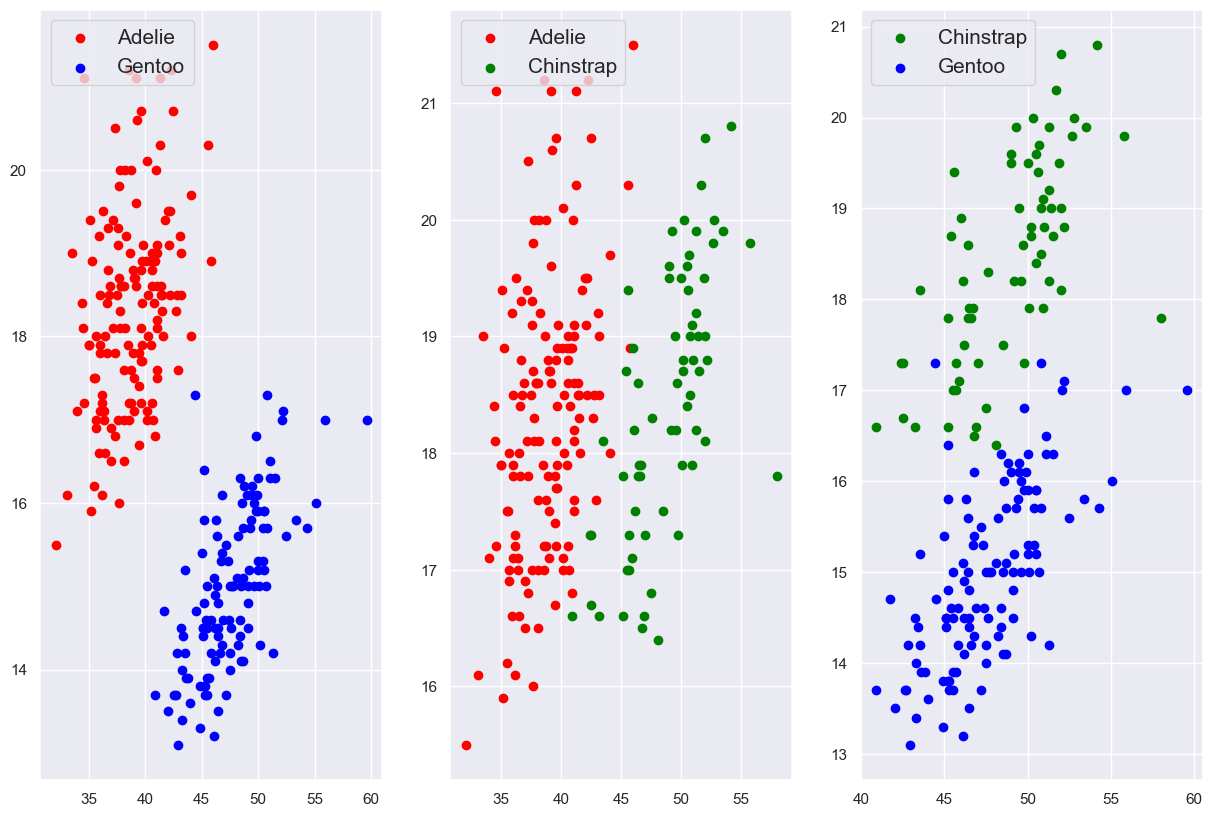

In [6]:

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn

Adelie = penguin_clean[penguin_clean.species == "Adelie"]
Gentoo = penguin_clean[penguin_clean.species == "Gentoo"]
Chinstrap = penguin_clean[penguin_clean.species == "Chinstrap"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(Adelie.culmen_length_mm, 
            Adelie.culmen_depth_mm, 
            color = "red", 
            label = "Adelie")

ax1.scatter(Gentoo.culmen_length_mm, 
            Gentoo.culmen_depth_mm, 
            color = "blue", 
            label = "Gentoo")
ax1.legend(fontsize = 15, loc = "upper left")

ax2.scatter(Adelie.culmen_length_mm, 
            Adelie.culmen_depth_mm, 
            color = "red", 
            label = "Adelie")
ax2.scatter(Chinstrap.culmen_length_mm, 
            Chinstrap.culmen_depth_mm, 
            color = "green", 
            label = "Chinstrap")
ax2.legend(fontsize = 15, loc = "upper left")

ax3.scatter(Chinstrap.culmen_length_mm, 
            Chinstrap.culmen_depth_mm, 
            color = "green", 
            label = "Chinstrap")

ax3.scatter(Gentoo.culmen_length_mm, 
            Gentoo.culmen_depth_mm, 
            color = "blue", 
            label = "Gentoo")
ax3.legend(fontsize = 15, loc = "upper left")

plt.show()

From the graph above, we see some clear non-linearity between species such as Adelie and Gentoo. They are linearily seperated. We would use this two species as their seperation is very clear comparing to Adele and Chinstrap, and Chinstrap and Fentoo which is almost linear in whole. 

In [7]:
Adelie=Adelie.assign(species='0')
Gentoo=Gentoo.assign(species='1')

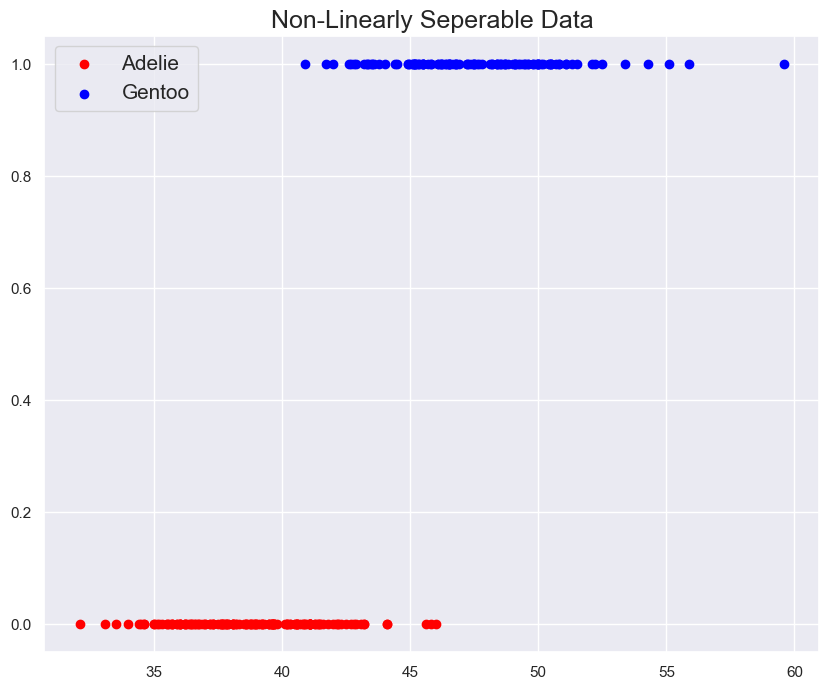

In [8]:
plt.figure(figsize = (10, 8))

plt.scatter(Adelie.culmen_length_mm, 
            np.zeros(146), 
            color = "red", 
            label = "Adelie")
plt.scatter(Gentoo.culmen_length_mm, 
            np.ones(119), 
            color = "blue", 
            label = "Gentoo")

plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

We use the Sigmoid Activation Function

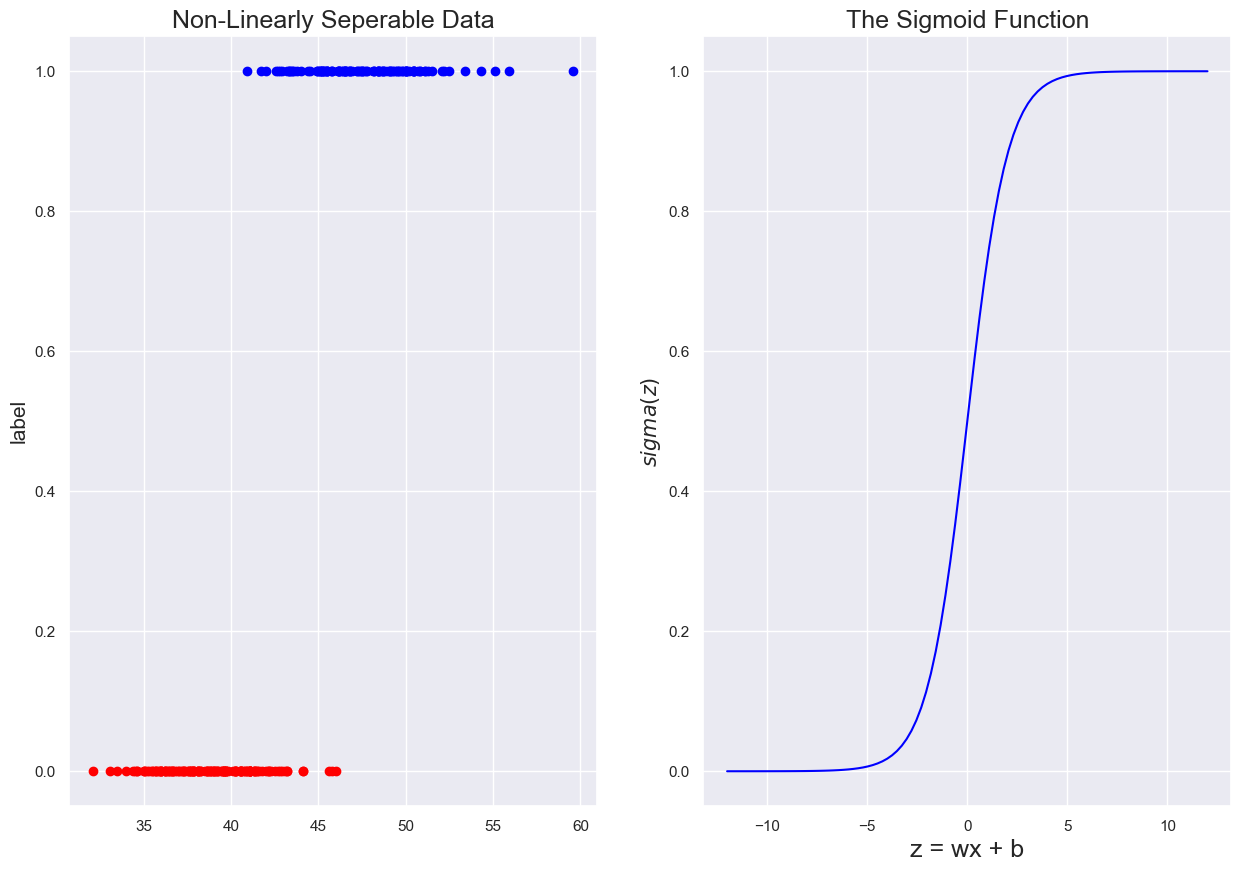

In [9]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(Adelie.culmen_length_mm, 
            np.zeros(146), 
            color = "red", 
            label = "Adelie")
ax1.scatter(Gentoo.culmen_length_mm, 
            np.ones(119), 
            color = "blue", 
            label = "Gentoo")
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

In [10]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
            self.w_ = np.random.rand(1 + X.shape[1])
            self.errors_ = []
            N = X.shape[0]
            for _ in range(epochs):
                errors = 0
                for xi, target in zip(X, y):
                    error = (self.predict(xi) - target)
                    self.w_[:-1] -= alpha*error*xi
                    self.w_[-1] -= alpha*error
                    #errors += .5*((self.predict(xi) - target)**2)
                    errors += self.cost_function(self.predict(xi), target)
                self.errors_.append(errors/N)
            return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [11]:
penguin_clean_2 = penguin_clean.loc[penguin["species"] != "Chinstrap"]
penguin_clean_2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0.0


In [36]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = penguin_clean_2.culmen_length_mm.values
X = X.reshape(-1, 1)
y = np.where(penguin_clean_2.species == "Adelie", 0, 1)

node.train(X, y, alpha = 0.01, epochs = 1000)